# Building second level group models using _nistats_

## Base functionality for _megameta_ project

-------
#### History

* 3/19/19 mbod - initial setup

-----

### Description

* Notebook to use `nistats` to create group 2nd level models from first level contrasts created using `nipype` `SPM12` pipeline.

In [1]:
%matplotlib inline

In [168]:
from nistats.second_level_model import SecondLevelModel
from nistats.design_matrix import create_second_level_design
from nistats.reporting import plot_design_matrix

from nistats.thresholding import map_threshold

from nilearn import plotting

from scipy.stats import norm


import matplotlib.pyplot as plt

import pandas as pd

import os

In [9]:
first_level_dir = '/data00/projects/project1/nipype/output_banner_1st_level'

In [10]:
con_files = [os.path.join(first_level_dir,subj,'model_BANNER_pmod_cogmech', 'spmT_0003.img')
                for subj in os.listdir(first_level_dir)
                if os.path.exists(
                os.path.join(first_level_dir,subj,'model_BANNER_pmod_cogmech', 'spmT_0003.img')
                )
            ]

In [64]:
subject_list = [p.split('/')[6] for p in con_files]

In [69]:
design_matrix = pd.DataFrame({ 'group': [1] * len(con_files), 'subject_label':subject_list})
                             

In [80]:
pdf = pd.read_csv('/data00/projects/project1/data/datasheets/banner_CA_paper_10-21-18.csv')

In [87]:
pdf2=pdf[['PID','T1IntentionAverage','mean_WC','FTND']]
pdf2=pdf2.drop_duplicates()

In [97]:
pdf2=pdf2.rename(columns={"PID":'subject_label'})

In [104]:
pdf3=pdf2[-pdf2.isnull().any(axis=1)]

In [105]:
pdf3

,subject_label,T1IntentionAverage,mean_WC,FTND
0,P113,2.666667,24.173913,5.0
1,P121,2.000000,15.304348,6.0
5,P124,1.333333,5.000000,3.0
13,P125,2.000000,34.000000,6.0
16,P100,2.000000,77.923077,6.0
17,P152,2.666667,43.347826,5.0
19,P132,3.333333,36.695652,4.0
20,P150,2.000000,65.478261,3.0
21,P101,2.000000,30.347826,3.0
22,P139,4.000000,33.782609,5.0


In [107]:
design_matrix=create_second_level_design(pdf3.subject_label,pdf3)

/usr/local/anaconda3/lib/python3.6/site-packages/nistats/design_matrix.py:464: UserWarning: Attention: Design matrix is singular. Aberrant estimates are expected.
  warn('Attention: Design matrix is singular. Aberrant estimates '


In [119]:
plot_design_matrix?

Signature: plot_design_matrix(design_matrix, rescale=True, ax=None)
Docstring:
Plot a design matrix provided as a DataFrame

Parameters
----------
design matrix : pandas DataFrame,
    Describes a design matrix.

rescale : bool, optional
    Rescale columns magnitude for visualization or not.

ax : axis handle, optional
    Handle to axis onto which we will draw design matrix.

Returns
-------
ax: axis handle
    The axis used for plotting.
File:      /usr/local/anaconda3/lib/python3.6/site-packages/nistats/reporting.py
Type:      function


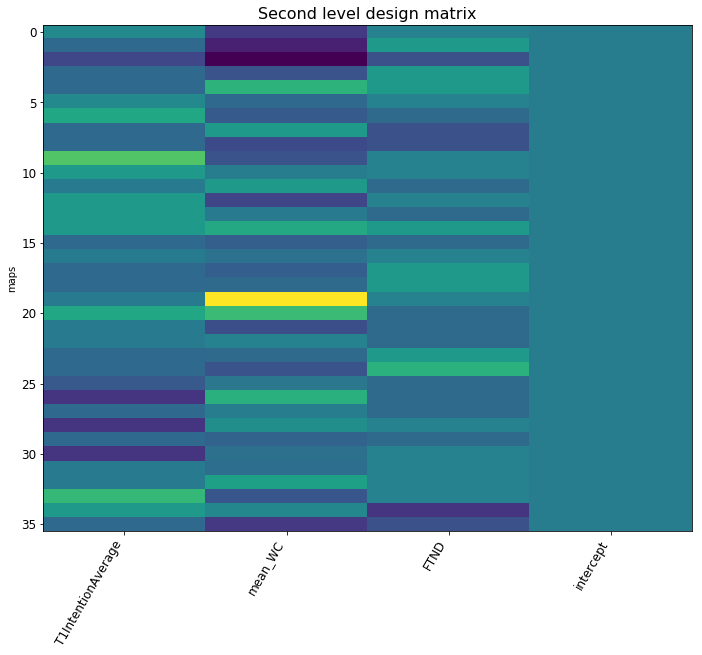

In [142]:

# plot the results
fig,fax = plt.subplots(figsize=(10,10))
ax = plot_design_matrix(design_matrix, rescale=True, ax=fax)
ax.set_title('Second level design matrix', fontsize=16)
ax.set_ylabel('maps')
ax.tick_params(labelsize=12)

In [147]:
con_files = [os.path.join(first_level_dir,subj,'model_BANNER_pmod_cogmech', 'con_0003.img')
                for subj in pdf3.subject_label
                if os.path.exists(
                os.path.join(first_level_dir,subj,'model_BANNER_pmod_cogmech', 'con_0003.img')
                )
            ]

In [185]:
second_level_input = con_files
#design_matrix = pd.DataFrame([1] * len(second_level_input),
#                             columns=['intercept'])

second_level_model = SecondLevelModel(mask='/data00/projects/project1/data/group/model_BANNER_quit_pmod/banner/mask.hdr')
second_level_model = second_level_model.fit(second_level_input,design_matrix=design_matrix)
second_level_model

SecondLevelModel(mask='/data00/projects/project1/data/group/model_BANNER_quit_pmod/banner/mask.hdr',
         memory=None, memory_level=1, minimize_memory=True, n_jobs=1,
         smoothing_fwhm=None, verbose=0)

In [152]:
mean_WC=second_level_model.compute_contrast(second_level_contrast='mean_WC',output_type='z_score')

In [156]:
T1Intent=second_level_model.compute_contrast(second_level_contrast='T1IntentionAverage',output_type='stat')

2


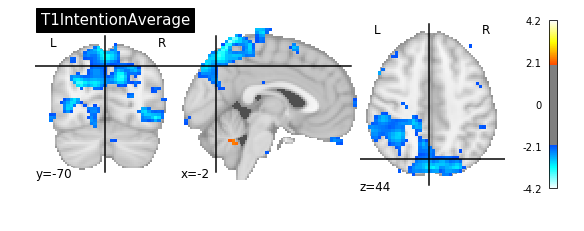

2


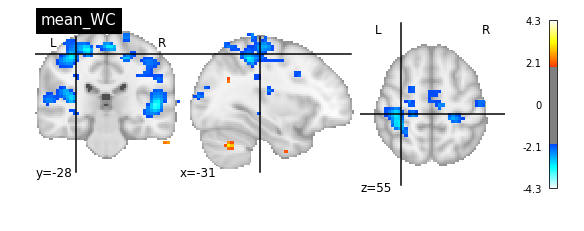

2


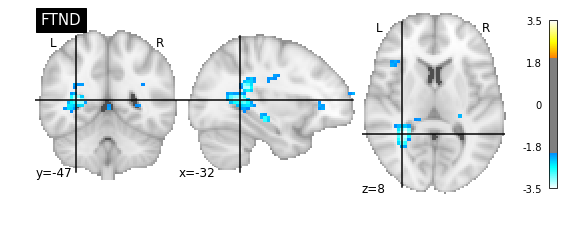

2


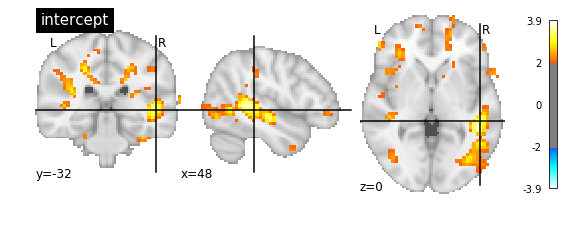

In [186]:
z_map={}
for contr in design_matrix.columns:
    z_map[contr] = second_level_model.compute_contrast(second_level_contrast=contr,output_type='z_score')
    
    threshold=2
    print(threshold)
    plotting.plot_stat_map(z_map[contr], title=contr, threshold=threshold)
    plt.show()

In [178]:
map_threshold(
        z_map, threshold=3, height_control='fdr')

(<nibabel.nifti1.Nifti1Image at 0x7f225a4095f8>, -2.4870828074101943)

In [170]:
map_threshold?

Signature: map_threshold(stat_img, mask_img=None, threshold=0.001, height_control='fpr', cluster_threshold=0)
Docstring:
Threshold the provided map

Parameters
----------
stat_img : Niimg-like object,
   statistical image (presumably in z scale)

mask_img : Niimg-like object, optional,
    mask image

threshold: float, optional
    cluster forming threshold (either a p-value or z-scale value)

height_control: string, optional
    false positive control meaning of cluster forming
    threshold: 'fpr'|'fdr'|'bonferroni'|'none'

cluster_threshold : float, optional
    cluster size threshold

Returns
-------
thresholded_map : Nifti1Image,
    the stat_map theresholded at the prescribed voxel- and cluster-level

threshold: float,
    the voxel-level threshold used actually
File:      /usr/local/anaconda3/lib/python3.6/site-packages/nistats/thresholding.py
Type:      function


## ===================== STRATCHPAD =====================

In [71]:
design_matrix=create_second_level_design(subject_list, design_matrix)

/usr/local/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1502: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]
/usr/local/anaconda3/lib/python3.6/site-packages/nistats/design_matrix.py:464: UserWarning: Attention: Design matrix is singular. Aberrant estimates are expected.
  warn('Attention: Design matrix is singular. Aberrant estimates '


In [28]:
con_files

['/data00/projects/project1/nipype/output_banner_1st_level/P154/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_banner_1st_level/P153/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_banner_1st_level/P152/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_banner_1st_level/P150/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_banner_1st_level/P147/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_banner_1st_level/P146/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_banner_1st_level/P145/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_banner_1st_level/P138/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_banner_1st_level/P151/model_BANNER_pmod_cogmech/spmT_0003.img',
 '/data00/projects/project1/nipype/output_bann

In [34]:
fl_df=pd.DataFrame({'effects_map_path': con_files,
                    'subject_label': [p.split('/')[6] for p in con_files],
                    'map_name': ['cogmech']*len(con_files)
                   })

In [35]:
fl_df

,effects_map_path,map_name,subject_label
0,/data00/projects/project1/nipype/output_banner...,cogmech,P154
1,/data00/projects/project1/nipype/output_banner...,cogmech,P153
2,/data00/projects/project1/nipype/output_banner...,cogmech,P152
3,/data00/projects/project1/nipype/output_banner...,cogmech,P150
4,/data00/projects/project1/nipype/output_banner...,cogmech,P147
5,/data00/projects/project1/nipype/output_banner...,cogmech,P146
6,/data00/projects/project1/nipype/output_banner...,cogmech,P145
7,/data00/projects/project1/nipype/output_banner...,cogmech,P138
8,/data00/projects/project1/nipype/output_banner...,cogmech,P151
9,/data00/projects/project1/nipype/output_banner...,cogmech,P143


In [72]:
second_level_model = SecondLevelModel()
sl_md=second_level_model.fit(fl_df, design_matrix=design_matrix)

In [73]:
sl_md.get_params()

{'mask': None,
 'memory': None,
 'memory_level': 1,
 'minimize_memory': True,
 'n_jobs': 1,
 'smoothing_fwhm': None,
 'verbose': 0}

In [75]:
z_map = sl_md.compute_contrast()

KeyError: 0

NameError: name 'plt' is not defined

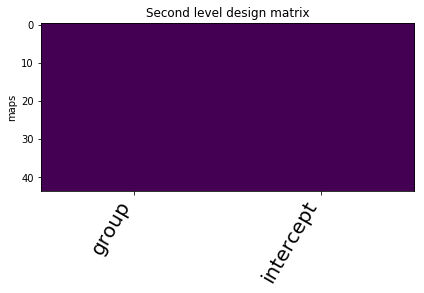

In [78]:
# plot the results
ax = plot_design_matrix(design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('maps')
plt.tight_layout()
plt.show()